In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression

In [2]:
# Load the dataset (Replace 'ev_data.csv' with your actual dataset file)
df = pd.read_csv('datasets/ev_data.csv')
df1 = pd.read_csv('datasets/charging_stations.csv')

# Data cleaning (if necessary)
# Check for missing values
print(df.isnull().sum())

# Drop or fill missing values
df = df.dropna()  # Or use df.fillna() if you want to fill them with specific values

# Print unique regions
unique_regions = df['region'].unique()
print(unique_regions)

# Data cleaning (if necessary)
# Check for missing values
# Filter for EV sales data
# Filter the dataframe for Historical data only
df_historical = df[df['category'] == 'Historical']

# Drop or fill missing values in historical data if necessary
df_historical = df_historical.dropna()  # Or use df.fillna() to fill missing values

# Print unique regions for historical data
unique_regions = df_historical['region'].unique()
print(f"Unique regions in historical data: {unique_regions}")

# Filter for EV sales data (historical)
ev_sales = df_historical[df_historical['parameter'] == 'EV sales']

# Aggregate EV sales by region and year (historical data only)
sales_summary = ev_sales.groupby(['region', 'year'])['value'].sum().reset_index()
sales_summary.rename(columns={'value': 'EV Sales (Total)'}, inplace=True)

# Filter for Charging stations data (historical)
charging_ports = df_historical[df_historical['parameter'] == 'EV charging points']

# Aggregate charging ports by region and year (historical data only)
charging_data = charging_ports.groupby(['region', 'year'])['value'].sum().reset_index()
charging_data.rename(columns={'value': 'Charging Ports (Total)'}, inplace=True)

# Merge EV sales and charging stations data on region and year
merged_data = pd.merge(sales_summary, charging_data, on=['region', 'year'], how='left')

# Coordinates for each region (assuming this dictionary is already defined)
# Coordinates for each region
coordinates = {
    'Australia': {'latitude': -25.2744, 'longitude': 133.7751},
    'Austria': {'latitude': 47.5162, 'longitude': 14.5501},
    'Belgium': {'latitude': 50.8503, 'longitude': 4.3517},
    'Brazil': {'latitude': -14.2350, 'longitude': -51.9253},
    'Bulgaria': {'latitude': 42.7339, 'longitude': 25.4858},
    'Canada': {'latitude': 56.1304, 'longitude': -106.3468},
    'Chile': {'latitude': -35.6751, 'longitude': -71.5430},
    'China': {'latitude': 35.8617, 'longitude': 104.1954},
    'Colombia': {'latitude': 4.5709, 'longitude': -74.2973},
    'Costa Rica': {'latitude': 9.7489, 'longitude': -83.7534},
    'Croatia': {'latitude': 45.1, 'longitude': 15.2},
    'Cyprus': {'latitude': 35.1264, 'longitude': 33.4299},
    'Czech Republic': {'latitude': 49.8175, 'longitude': 15.4720},
    'Denmark': {'latitude': 56.2639, 'longitude': 9.5018},
    'Estonia': {'latitude': 58.5953, 'longitude': 25.0136},
    'EU27': {'latitude': 52.0, 'longitude': 13.0},
    'Europe': {'latitude': 54.5260, 'longitude': 15.2551},
    'Finland': {'latitude': 61.9241, 'longitude': 25.7482},
    'France': {'latitude': 46.6034, 'longitude': 1.8883},
    'Germany': {'latitude': 51.1657, 'longitude': 10.4515},
    'Greece': {'latitude': 39.0742, 'longitude': 21.8243},
    'Hungary': {'latitude': 47.1625, 'longitude': 19.5033},
    'Iceland': {'latitude': 64.9631, 'longitude': -19.0208},
    'India': {'latitude': 20.5937, 'longitude': 78.9629},
    'Indonesia': {'latitude': -0.7893, 'longitude': 113.9213},
    'Ireland': {'latitude': 53.1424, 'longitude': -7.6921},
    'Israel': {'latitude': 31.9686, 'longitude': 34.7695},
    'Italy': {'latitude': 41.8719, 'longitude': 12.5674},
    'Japan': {'latitude': 36.2048, 'longitude': 138.2529},
    'Korea': {'latitude': 35.9078, 'longitude': 127.7669},
    'Latvia': {'latitude': 56.8796, 'longitude': 24.6032},
    'Lithuania': {'latitude': 55.1694, 'longitude': 23.8813},
    'Luxembourg': {'latitude': 49.6117, 'longitude': 6.13},
    'Mexico': {'latitude': 23.6345, 'longitude': -102.5528},
    'Netherlands': {'latitude': 52.3794, 'longitude': 4.9009},
    'New Zealand': {'latitude': -40.9006, 'longitude': 174.8860},
    'Norway': {'latitude': 60.4720, 'longitude': 8.4689},
    'Poland': {'latitude': 51.9194, 'longitude': 19.1451},
    'Portugal': {'latitude': 39.3999, 'longitude': -8.2245},
    'Rest of the world': {'latitude': 20.0, 'longitude': 0.0},
    'Romania': {'latitude': 45.9432, 'longitude': 24.9668},
    'Seychelles': {'latitude': -4.6796, 'longitude': 55.4920},
    'Slovakia': {'latitude': 48.6690, 'longitude': 19.6990},
    'Slovenia': {'latitude': 46.1511, 'longitude': 14.9955},
    'South Africa': {'latitude': -30.5595, 'longitude': 22.9375},
    'Spain': {'latitude': 40.4637, 'longitude': -3.7492},
    'Sweden': {'latitude': 60.1282, 'longitude': 18.6435},
    'Switzerland': {'latitude': 46.8182, 'longitude': 8.2275},
    'Thailand': {'latitude': 15.8700, 'longitude': 100.9925},
    'Turkiye': {'latitude': 38.9637, 'longitude': 35.2433},
    'United Arab Emirates': {'latitude': 23.4241, 'longitude': 53.8478},
    'United Kingdom': {'latitude': 51.5074, 'longitude': -0.1278},
    'USA': {'latitude': 37.0902, 'longitude': -95.7129},
    'World': {'latitude': 0.0, 'longitude': 0.0}
}

# Add latitude and longitude columns based on region
merged_data['latitude'] = merged_data['region'].map(lambda x: coordinates.get(x, {'latitude': None})['latitude'])
merged_data['longitude'] = merged_data['region'].map(lambda x: coordinates.get(x, {'longitude': None})['longitude'])

# Check if there are any missing values in the latitude or longitude columns
missing_coords = merged_data[merged_data['latitude'].isnull()]
print(f"Missing coordinates for regions: {missing_coords['region'].unique()}")

# Handle missing values for Charging Ports (if necessary)
merged_data['Charging Ports (Total)'] = merged_data['Charging Ports (Total)'].fillna(0).astype(int)

# Save the final processed data to a new CSV file
merged_data.to_csv('ev_sales_and_charging_data.csv', index=False)

# Display the first few rows of the final merged DataFrame
print(merged_data.head())

region        0
category      0
parameter     0
mode          0
powertrain    0
year          0
unit          0
value         0
dtype: int64
['Australia' 'Austria' 'Belgium' 'Brazil' 'Bulgaria' 'Canada' 'Chile'
 'China' 'Colombia' 'Costa Rica' 'Croatia' 'Cyprus' 'Czech Republic'
 'Denmark' 'Estonia' 'EU27' 'Europe' 'Finland' 'France' 'Germany' 'Greece'
 'Hungary' 'Iceland' 'India' 'Indonesia' 'Ireland' 'Israel' 'Italy'
 'Japan' 'Korea' 'Latvia' 'Lithuania' 'Luxembourg' 'Mexico' 'Netherlands'
 'New Zealand' 'Norway' 'Poland' 'Portugal' 'Rest of the world' 'Romania'
 'Seychelles' 'Slovakia' 'Slovenia' 'South Africa' 'Spain' 'Sweden'
 'Switzerland' 'Thailand' 'Turkiye' 'United Arab Emirates'
 'United Kingdom' 'USA' 'World']
Unique regions in historical data: ['Australia' 'Austria' 'Belgium' 'Brazil' 'Bulgaria' 'Canada' 'Chile'
 'China' 'Colombia' 'Costa Rica' 'Croatia' 'Cyprus' 'Czech Republic'
 'Denmark' 'Estonia' 'EU27' 'Europe' 'Finland' 'France' 'Germany' 'Greece'
 'Hungary' 'Iceland'

C:\Users\sdeep\AppData\Local\Temp\ipykernel_43808\2545183064.py:3: DtypeWarning: Columns (6,20,31,45,46,63,69,74) have mixed types. Specify dtype option on import or set low_memory=False.
  df1 = pd.read_csv('datasets/charging_stations.csv')


In [3]:
# Select the necessary columns
filtered_df = df1[df1['Status Code'] == 'E']

# Select the necessary columns
cleaned_df = filtered_df[['Station Name', 'Street Address', 'City', 'State', 'ZIP', 'Latitude', 'Longitude', 'EV Level1 EVSE Num', 'EV Level2 EVSE Num', 'EV DC Fast Count']]

# Rename the columns to be more readable if necessary
cleaned_df.columns = ['Station Name', 'Street_Address', 'City', 'State', 'ZIP', 'Latitude', 'Longitude', 'Level_1_Ports', 'Level_2_Ports', 'DC_Fast_Ports']
cleaned_df.replace("Unknown", pd.NA, inplace=True)

# Convert the relevant columns to numeric, ensuring 'Unknown' becomes NaN (NULL)
cleaned_df['Level_1_Ports'] = pd.to_numeric(cleaned_df['Level_1_Ports'], errors='coerce')
cleaned_df['Level_2_Ports'] = pd.to_numeric(cleaned_df['Level_2_Ports'], errors='coerce')
cleaned_df['DC_Fast_Ports'] = pd.to_numeric(cleaned_df['DC_Fast_Ports'], errors='coerce')

# Ensure Latitude and Longitude are numeric
cleaned_df['Latitude'] = pd.to_numeric(cleaned_df['Latitude'], errors='coerce')
cleaned_df['Longitude'] = pd.to_numeric(cleaned_df['Longitude'], errors='coerce')
# Write the cleaned data to a new CSV file
cleaned_df.to_csv('cleaned_charging_stations_filtered.csv', index=False)



print("Cleaned data has been written to 'cleaned_charging_stations.csv'.")
# Preview the dataset to understand its structure

df

C:\Users\sdeep\AppData\Local\Temp\ipykernel_43808\2697612334.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cleaned_df.replace("Unknown", pd.NA, inplace=True)
C:\Users\sdeep\AppData\Local\Temp\ipykernel_43808\2697612334.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cleaned_df['Level_1_Ports'] = pd.to_numeric(cleaned_df['Level_1_Ports'], errors='coerce')
C:\Users\sdeep\AppData\Local\Temp\ipykernel_43808\2697612334.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] =

Cleaned data has been written to 'cleaned_charging_stations.csv'.


,region,category,parameter,mode,powertrain,year,unit,value
0,Australia,Historical,EV stock share,Cars,EV,2011,percent,3.900000e-04
1,Australia,Historical,EV sales share,Cars,EV,2011,percent,6.500000e-03
2,Australia,Historical,EV sales,Cars,BEV,2011,Vehicles,4.900000e+01
3,Australia,Historical,EV stock,Cars,BEV,2011,Vehicles,4.900000e+01
4,Australia,Historical,EV stock,Cars,BEV,2012,Vehicles,2.200000e+02
...,...,...,...,...,...,...,...,...
12649,World,Projection-STEPS,EV sales share,Cars,EV,2035,percent,5.500000e+01
12650,World,Projection-STEPS,EV stock share,Cars,EV,2035,percent,3.100000e+01
12651,World,Projection-APS,EV charging points,EV,Publicly available fast,2035,charging points,9.400000e+06
12652,World,Projection-APS,EV charging points,EV,Publicly available slow,2035,charging points,1.500000e+07


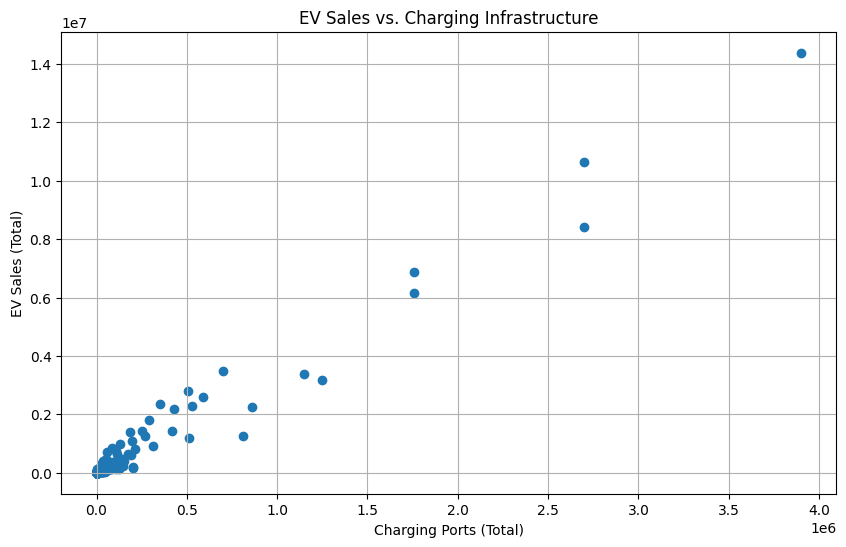

Pearson Correlation Coefficient: 0.9841428266183211


In [4]:
# Assuming your dataset has 'Charging Ports (Total)' and 'EV Sales (Total)' columns
data = pd.read_csv('ev_sales_and_charging_data.csv')  # Load your dataset

# Scatter Plot
plt.figure(figsize=(10, 6))
plt.scatter(data['Charging Ports (Total)'], data['EV Sales (Total)'], color='tab:blue')
plt.title('EV Sales vs. Charging Infrastructure')
plt.xlabel('Charging Ports (Total)')
plt.ylabel('EV Sales (Total)')
plt.grid(True)
plt.show()
correlation = data['Charging Ports (Total)'].corr(data['EV Sales (Total)'])
print(f'Pearson Correlation Coefficient: {correlation}')

In [5]:
X = data['Charging Ports (Total)'].values.reshape(-1, 1)  # Independent variable (charging stations)
y = data['EV Sales (Total)'].values  # Dependent variable (EV sales)

# Create and train the regression model
model = LinearRegression()
model.fit(X, y)

# Print the regression line equation
print(f'Regression Line: EV Sales = {model.coef_[0]:.2f} * Charging Ports + {model.intercept_:.2f}')

Regression Line: EV Sales = 3.56 * Charging Ports + 8299.00


In [6]:
# Convert 'year' to integer if it's not already
df['year'] = df['year'].astype(int)

# Filter data for a specific country (e.g., Australia)
australia_df = df[df['region'] == 'Australia']

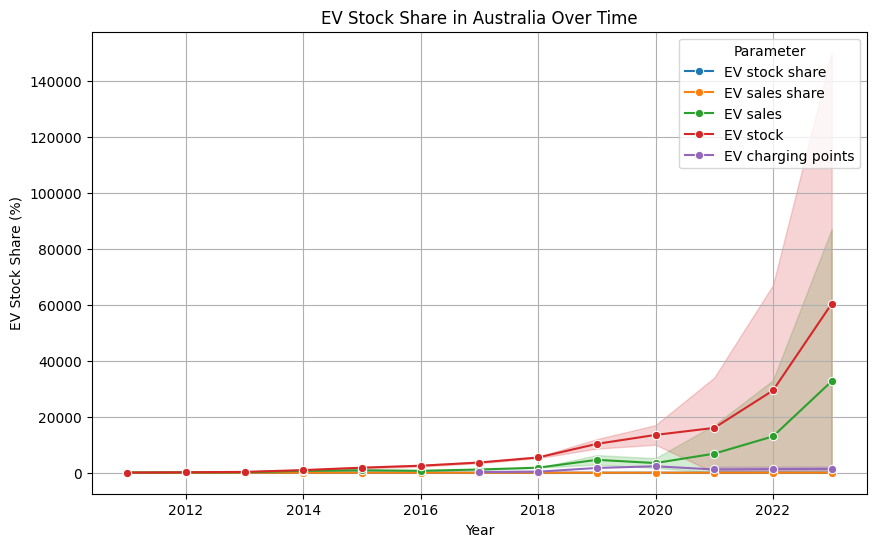

In [7]:
# Plotting the EV stock share in Australia over the years
plt.figure(figsize=(10, 6))
sns.lineplot(data=australia_df, x='year', y='value', hue='parameter', marker='o')
plt.title('EV Stock Share in Australia Over Time')
plt.xlabel('Year')
plt.ylabel('EV Stock Share (%)')
plt.legend(title='Parameter')
plt.grid(True)
plt.show()

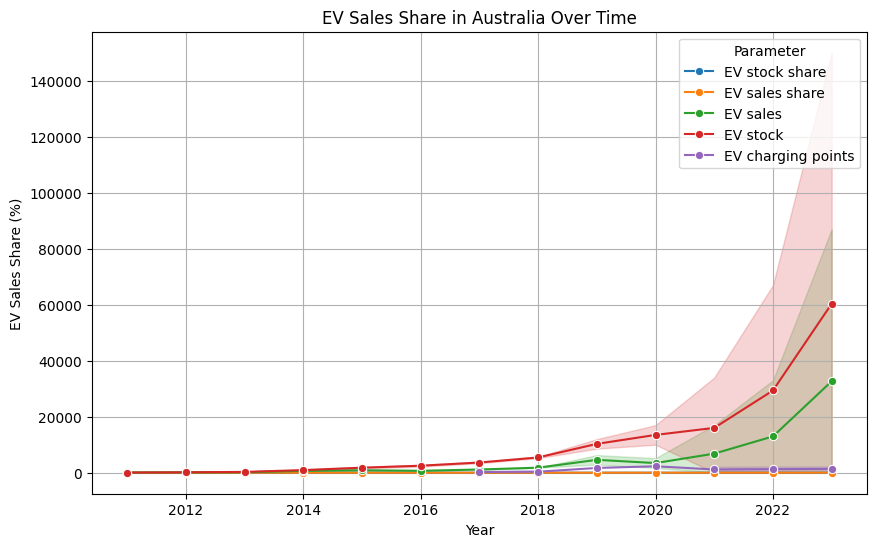

In [8]:
# Plotting EV sales share in Australia over the years
plt.figure(figsize=(10, 6))
sns.lineplot(data=australia_df, x='year', y='value', hue='parameter', marker='o')
plt.title('EV Sales Share in Australia Over Time')
plt.xlabel('Year')
plt.ylabel('EV Sales Share (%)')
plt.legend(title='Parameter')
plt.grid(True)
plt.show()

C:\Users\sdeep\AppData\Local\Temp\ipykernel_43808\3978664168.py:9: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(data=top_countries_df, x='region', y='value', hue='year', ci=None)


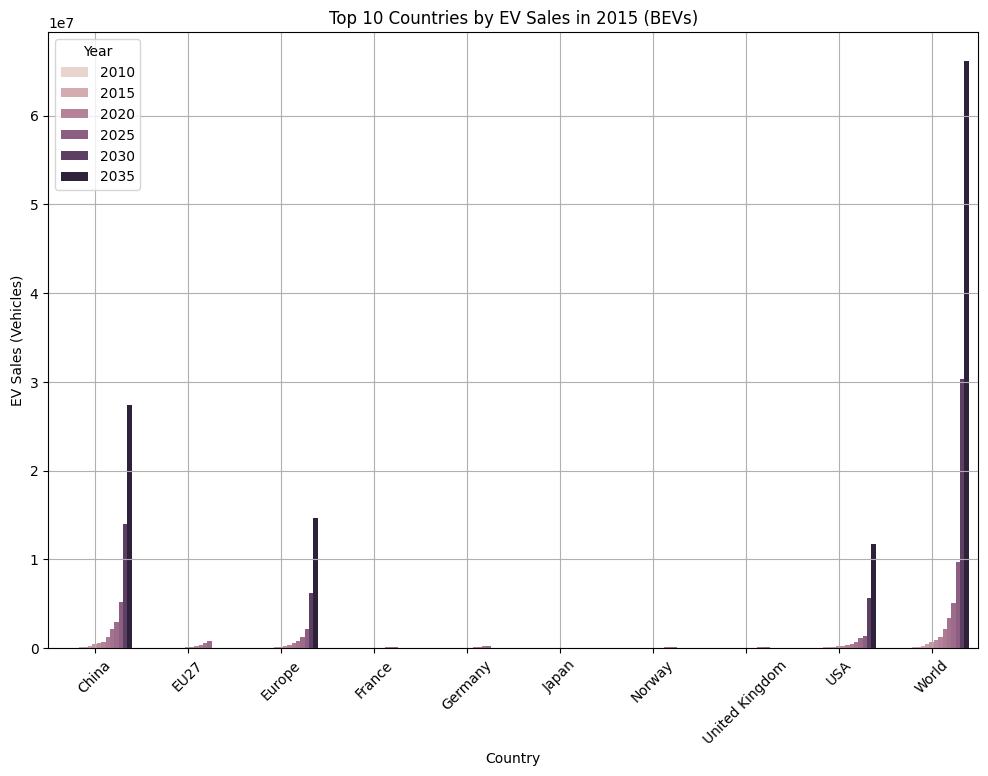

In [9]:
# Filter data for BEVs only
bevs_df = df[df['powertrain'] == 'BEV']

# Plotting global EV sales for BEVs across multiple countries (top 10 countries in 2015)
top_countries = bevs_df[bevs_df['year'] == 2015].groupby('region')['value'].sum().sort_values(ascending=False).head(10)
top_countries_df = bevs_df[bevs_df['region'].isin(top_countries.index)]

plt.figure(figsize=(12, 8))
sns.barplot(data=top_countries_df, x='region', y='value', hue='year', ci=None)
plt.title('Top 10 Countries by EV Sales in 2015 (BEVs)')
plt.xlabel('Country')
plt.ylabel('EV Sales (Vehicles)')
plt.xticks(rotation=45)
plt.legend(title='Year')
plt.grid(True)
plt.show()

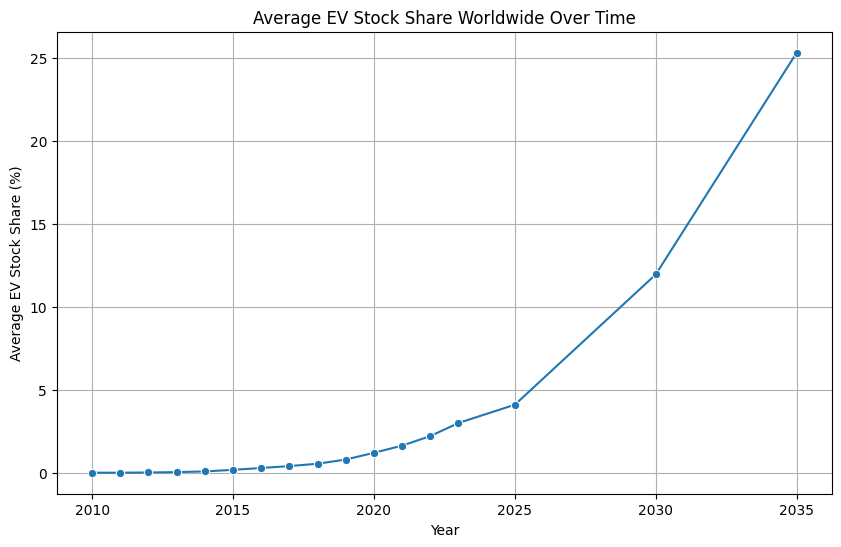

In [10]:
# Further analysis: Calculating the average EV stock share across all countries for each year
avg_ev_stock_share = df[df['parameter'] == 'EV stock share'].groupby('year')['value'].mean()

# Plot the average EV stock share over the years
plt.figure(figsize=(10, 6))
sns.lineplot(x=avg_ev_stock_share.index, y=avg_ev_stock_share.values, marker='o')
plt.title('Average EV Stock Share Worldwide Over Time')
plt.xlabel('Year')
plt.ylabel('Average EV Stock Share (%)')
plt.grid(True)
plt.show()


In [11]:
sales_share_df = df[['region', 'category', 'parameter', 'mode', 'year', 'value']]
sales_share_df

,region,category,parameter,mode,year,value
0,Australia,Historical,EV stock share,Cars,2011,3.900000e-04
1,Australia,Historical,EV sales share,Cars,2011,6.500000e-03
2,Australia,Historical,EV sales,Cars,2011,4.900000e+01
3,Australia,Historical,EV stock,Cars,2011,4.900000e+01
4,Australia,Historical,EV stock,Cars,2012,2.200000e+02
...,...,...,...,...,...,...
12649,World,Projection-STEPS,EV sales share,Cars,2035,5.500000e+01
12650,World,Projection-STEPS,EV stock share,Cars,2035,3.100000e+01
12651,World,Projection-APS,EV charging points,EV,2035,9.400000e+06
12652,World,Projection-APS,EV charging points,EV,2035,1.500000e+07


In [12]:
filtered_sales_share_df = sales_share_df[
    (sales_share_df['category'] == 'Historical') & 
    (sales_share_df['parameter'].isin(['EV stock share', 'EV sales share']))
]

# Display the filtered DataFrame
print(filtered_sales_share_df)

          region    category       parameter    mode  year     value
0      Australia  Historical  EV stock share    Cars  2011   0.00039
1      Australia  Historical  EV sales share    Cars  2011   0.00650
6      Australia  Historical  EV sales share    Cars  2012   0.03000
7      Australia  Historical  EV stock share    Cars  2012   0.00240
12     Australia  Historical  EV stock share    Cars  2013   0.00460
...          ...         ...             ...     ...   ...       ...
12365      World  Historical  EV stock share  Trucks  2023   0.36000
12366      World  Historical  EV sales share  Trucks  2023   0.91000
12375      World  Historical  EV stock share    Cars  2023   3.20000
12376      World  Historical  EV sales share    Cars  2023  18.00000
12377      World  Historical  EV stock share    Vans  2023   0.85000

[2547 rows x 6 columns]


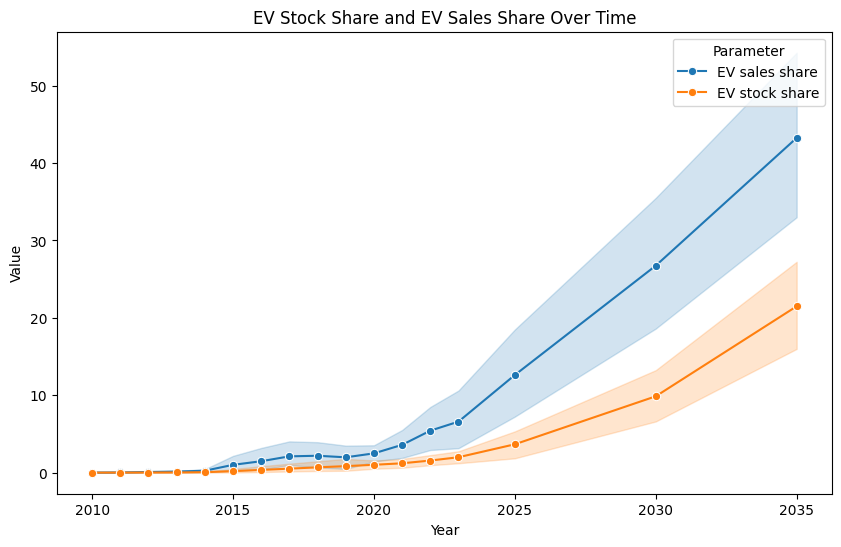

In [13]:
import matplotlib.pyplot as plt
import seaborn as sns

# Filter for relevant parameters
trend_data = sales_share_df[
    (sales_share_df['region'] == 'World') &
    (sales_share_df['parameter'].isin(['EV stock share', 'EV sales share']))
]

plt.figure(figsize=(10, 6))
sns.lineplot(data=trend_data, x='year', y='value', hue='parameter', marker='o')
plt.title('EV Stock Share and EV Sales Share Over Time')
plt.xlabel('Year')
plt.ylabel('Value')
plt.legend(title='Parameter')
plt.show()


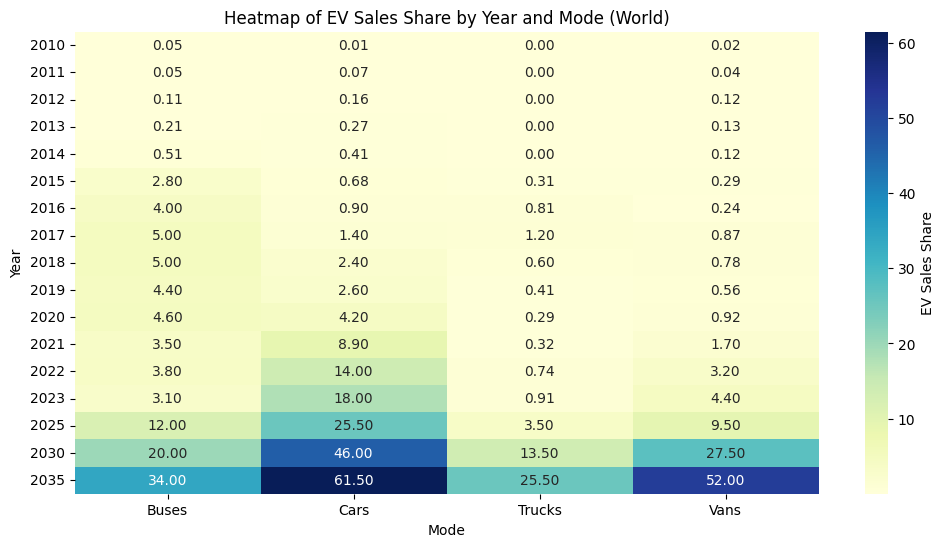

In [14]:
# Filter for 'EV sales share' and 'World' region
heatmap_data = sales_share_df[
    (sales_share_df['parameter'] == 'EV sales share') &
    (sales_share_df['region'] == 'World')
]

# Pivot the data for heatmap, using 'mode' as columns instead of 'parameter'
heatmap_pivot = heatmap_data.pivot_table(index='year', columns='mode', values='value', aggfunc='mean')

# Plot heatmap
plt.figure(figsize=(12, 6))
sns.heatmap(heatmap_pivot, annot=True, cmap="YlGnBu", fmt=".2f", cbar_kws={'label': 'EV Sales Share'})
plt.title('Heatmap of EV Sales Share by Year and Mode (World)')
plt.ylabel('Year')
plt.xlabel('Mode')
plt.show()

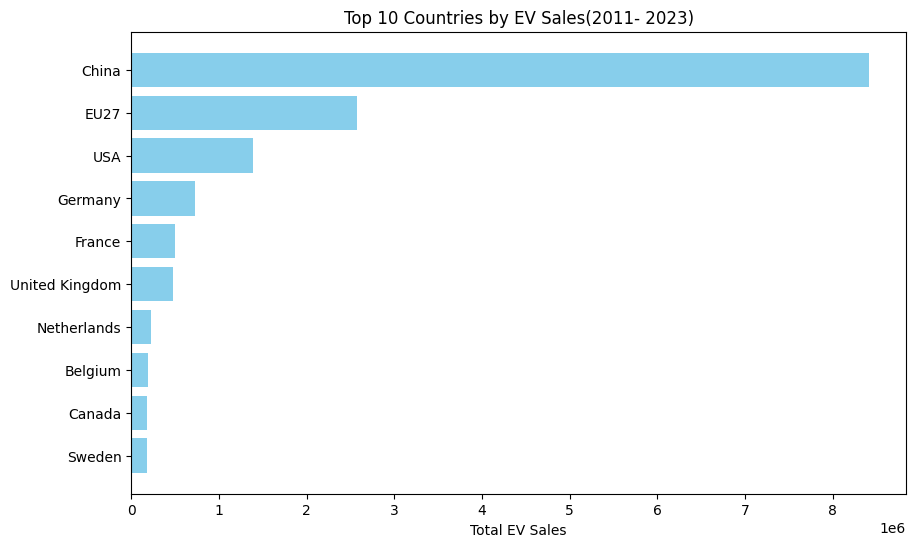

In [15]:
# Filter the DataFrame based on the conditions: 'EV sales', year 2023, and category 'Historical'
new_df = df[(df['parameter'] == 'EV sales') & 
            (df['year'] == 2023) & 
            (df['category'] == 'Historical') & 
            (df['region'] != 'World') & 
            (df['region'] != 'Europe')]

# Group by 'region' and calculate the sum of 'value' for each region
new_df_grouped = new_df.groupby('region', as_index=False)['value'].sum()

# Sort the new DataFrame by the 'value' column in descending order
new_df_sorted = new_df_grouped.sort_values(by='value', ascending=False)

# Get the top 10 countries by EV sales sum
top_10_countries = new_df_sorted.head(10)
top_10_countries
# Get the top 10 countries by EV sales sum
top_10_countries = new_df_sorted.head(10)

# Plotting the data
plt.figure(figsize=(10, 6))  # Set the figure size
plt.barh(top_10_countries['region'], top_10_countries['value'], color='skyblue')  # Horizontal bar chart
plt.xlabel('Total EV Sales')  # X-axis label
plt.title('Top 10 Countries by EV Sales(2011- 2023)')  # Chart title
plt.gca().invert_yaxis()  # Invert y-axis to display highest values at the top
plt.show()

In [16]:


# Filter the data for the year 2023
df_2023 = df[df['year'] == 2023]

# Extract EV sales, EV stock, and charging points data
# Filter for each parameter and sum the 'value' field for each region

# EV Sales
ev_sales_df = df_2023[df_2023['parameter'] == 'EV sales']
ev_sales_agg = ev_sales_df.groupby('region')['value'].sum().reset_index()
ev_sales_agg.rename(columns={'value': 'ev_sales'}, inplace=True)

# EV Stock
ev_stock_df = df_2023[df_2023['parameter'] == 'EV stock']
ev_stock_agg = ev_stock_df.groupby('region')['value'].sum().reset_index()
ev_stock_agg.rename(columns={'value': 'ev_stock'}, inplace=True)

# EV Charging Points
charging_points_df = df_2023[df_2023['parameter'] == 'EV charging points']
charging_points_agg = charging_points_df.groupby('region')['value'].sum().reset_index()
charging_points_agg.rename(columns={'value': 'charging_points'}, inplace=True)

# Merge the three dataframes based on 'region'
result_df = pd.merge(ev_sales_agg, ev_stock_agg, on='region', how='outer')
result_df = pd.merge(result_df, charging_points_agg, on='region', how='outer')

# Optional: Reset index for clean dataframe
result_df.reset_index(drop=True, inplace=True)

# Display the final result
print(result_df)




                  region    ev_sales     ev_stock  charging_points
0              Australia     98006.0     181065.0           2760.0
1                Austria     65009.0     221089.0          17500.0
2                Belgium    196751.0     478897.0          44000.0
3                 Brazil     53700.0      96606.0           3804.9
4               Bulgaria      2160.0          NaN              NaN
5                 Canada    187021.0     554337.0          26800.0
6                  Chile       920.0       3902.0           1070.0
7                  China  25246920.0   70319880.0        8100000.0
8               Colombia      6100.0          NaN              NaN
9             Costa Rica      4900.0       9000.0              NaN
10               Croatia      2590.0          NaN              NaN
11                Cyprus      1300.0          NaN              NaN
12        Czech Republic     12000.0          NaN              NaN
13               Denmark     83791.0     320435.0          170

In [17]:
# Extract the specific correlation value between 'ev_sales' and 'charging_points'
correlation_value = result_df[['ev_sales', 'charging_points']].corr(method='pearson').iloc[0, 1]

# Display the correlation value
print(correlation_value)


0.993961684004196


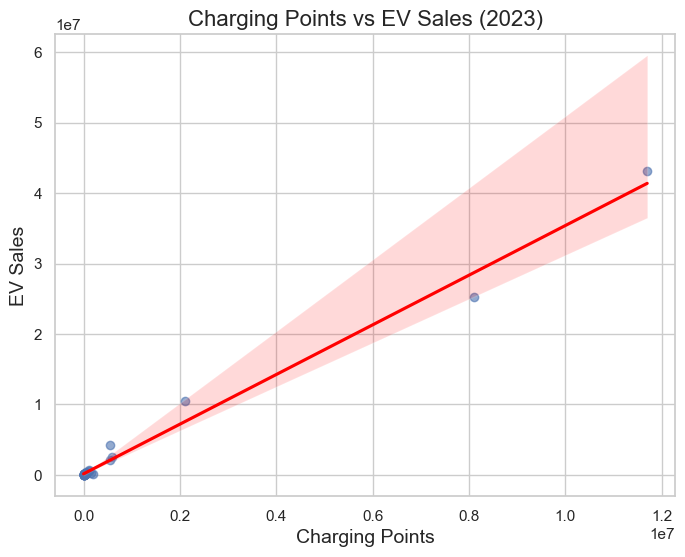

In [18]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set the plot style
sns.set(style="whitegrid")

# Create the scatter plot with a regression line (swapped x and y)
plt.figure(figsize=(8, 6))
sns.regplot(x='charging_points', y='ev_sales', data=result_df, scatter_kws={'alpha':0.6}, line_kws={'color':'red'})

# Title and labels
plt.title('Charging Points vs EV Sales (2023)', fontsize=16)
plt.xlabel('Charging Points', fontsize=14)
plt.ylabel('EV Sales', fontsize=14)

# Show the plot
plt.show()


In [19]:
# Filter the data for years up to and including 2023
df_up_to_2023 = df[df['year'] <= 2023]

# Extract EV sales, EV stock, and charging points data
# Filter for each parameter and sum the 'value' field for each region and year

# EV Sales
ev_sales_df = df_up_to_2023[df_up_to_2023['parameter'] == 'EV sales']
ev_sales_agg = ev_sales_df.groupby(['region', 'year'])['value'].sum().reset_index()
ev_sales_agg.rename(columns={'value': 'ev_sales'}, inplace=True)

# EV Stock
ev_stock_df = df_up_to_2023[df_up_to_2023['parameter'] == 'EV stock']
ev_stock_agg = ev_stock_df.groupby(['region', 'year'])['value'].sum().reset_index()
ev_stock_agg.rename(columns={'value': 'ev_stock'}, inplace=True)

# EV Charging Points
charging_points_df = df_up_to_2023[df_up_to_2023['parameter'] == 'EV charging points']
charging_points_agg = charging_points_df.groupby(['region', 'year'])['value'].sum().reset_index()
charging_points_agg.rename(columns={'value': 'charging_points'}, inplace=True)

# Merge the three dataframes based on 'region' and 'year'
result_df = pd.merge(ev_sales_agg, ev_stock_agg, on=['region', 'year'], how='outer')
result_df = pd.merge(result_df, charging_points_agg, on=['region', 'year'], how='outer')

# Optional: Reset index for clean dataframe
result_df.reset_index(drop=True, inplace=True)

# Display the final result (now includes 'year')
result_df.head(40)


,region,year,ev_sales,ev_stock,charging_points
0,Australia,2011,49.0,49.0,NaN
1,Australia,2012,250.0,300.0,NaN
2,Australia,2013,290.0,590.0,NaN
3,Australia,2014,1320.0,1880.0,NaN
4,Australia,2015,1760.0,3600.0,NaN
5,Australia,2016,1370.0,5000.0,NaN
6,Australia,2017,2300.0,7300.0,480.0
7,Australia,2018,3600.0,10900.0,731.0
8,Australia,2019,9200.0,20600.0,1700.0
9,Australia,2020,6900.0,27000.0,2300.0


In [20]:
# Drop rows where 'charging_points' is NaN to calculate correlation
df_clean = result_df.dropna(subset=['charging_points'])

# Group by region and calculate correlation between EV sales and charging points for each region
correlation_results = df_clean.groupby('region').apply(
    lambda x: x[['ev_sales', 'charging_points']].corr().iloc[0, 1]
).reset_index(name='correlation')

# Display the correlation results
print(correlation_results)

               region  correlation
0           Australia     0.661870
1             Austria     0.946224
2             Belgium     0.992356
3              Brazil     0.915382
4              Canada     0.984165
5               Chile     0.846208
6               China     0.986725
7             Denmark     0.885307
8                EU27     0.975292
9              Europe     0.990314
10            Finland     0.990957
11             France     0.967174
12            Germany     0.948205
13             Greece     0.981934
14            Iceland     0.947848
15              India     0.950628
16          Indonesia          NaN
17             Israel     0.948441
18              Italy     0.926852
19              Japan     0.594039
20              Korea     0.976370
21             Mexico     0.837564
22        Netherlands     0.965119
23        New Zealand     0.912166
24             Norway     0.944983
25             Poland     0.996658
26           Portugal     0.991032
27  Rest of the worl

In [21]:
# Filter the data for the region 'World'
df_world = df[(df['region'] == 'World') & (df['category'] == 'Historical')]

# EV Sales: Parameter = 'EV sales', grouped by 'year', sum the 'value'
ev_sales_df = df_world[df_world['parameter'] == 'EV sales']
ev_sales_agg = ev_sales_df.groupby('year')['value'].sum().reset_index()
ev_sales_agg.rename(columns={'value': 'ev_sales'}, inplace=True)

# EV Stock: Parameter = 'EV stock', grouped by 'year', sum the 'value'
ev_stock_df = df_world[df_world['parameter'] == 'EV stock']
ev_stock_agg = ev_stock_df.groupby('year')['value'].sum().reset_index()
ev_stock_agg.rename(columns={'value': 'ev_stock'}, inplace=True)

# EV Charging Points: Parameter = 'EV charging points', grouped by 'year', sum the 'value'
charging_points_df = df_world[df_world['parameter'] == 'EV charging points']
charging_points_agg = charging_points_df.groupby('year')['value'].sum().reset_index()
charging_points_agg.rename(columns={'value': 'charging_points'}, inplace=True)

# Merge the three aggregated dataframes on 'year'
result_df = pd.merge(ev_sales_agg, ev_stock_agg, on='year', how='outer')
result_df = pd.merge(result_df, charging_points_agg, on='year', how='outer')

# Display the final result
result_df.head()


,year,ev_sales,ev_stock,charging_points
0,2010,10318.0,37367.0,4010.0
1,2011,53778.0,90309.0,10830.0
2,2012,133079.0,225707.0,29500.0
3,2013,216041.0,439378.0,43600.0
4,2014,351555.0,791920.0,102000.0


In [22]:
# Filter the data for EV sales and charging points from the 'df_world' DataFrame
ev_sales_charging_df = df_world[df_world['parameter'].isin(['EV sales', 'EV charging points'])]

# Pivot the table to get 'ev_sales' and 'charging_points' for each year
pivot_df = ev_sales_charging_df.pivot_table(index='year', columns='parameter', values='value', aggfunc='sum')

# Drop rows with NaN values in either 'EV sales' or 'charging points'
pivot_df_clean = pivot_df.dropna(subset=['EV sales', 'EV charging points'])

# Calculate the correlation between 'EV sales' and 'charging points'
correlation = pivot_df_clean['EV sales'].corr(pivot_df_clean['EV charging points'])

# Display the correlation result
print(f"Correlation between EV sales and Charging Points: {correlation}")


Correlation between EV sales and Charging Points: 0.9930556663759286


0.9931 is very close to 1, which is the maximum possible correlation. This suggests that for the region 'World' and category 'Historical', the growth in EV sales is almost perfectly associated with an increase in the number of charging points.

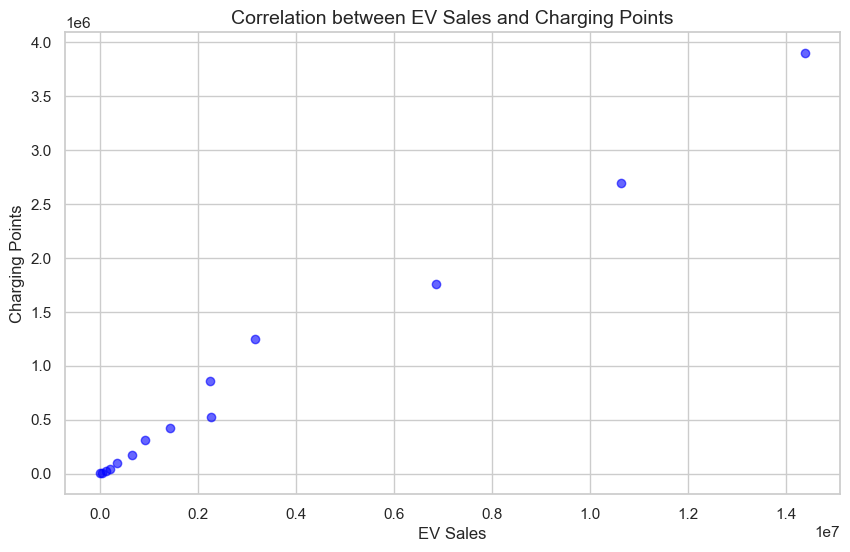

In [23]:
# Plot the relationship between 'EV sales' and 'charging points'
plt.figure(figsize=(10, 6))
plt.scatter(pivot_df_clean['EV sales'], pivot_df_clean['EV charging points'], color='blue', alpha=0.6)

# Adding titles and labels
plt.title('Correlation between EV Sales and Charging Points', fontsize=14)
plt.xlabel('EV Sales', fontsize=12)
plt.ylabel('Charging Points', fontsize=12)

# Show the plot
plt.grid(True)
plt.show()

In [24]:
# Filter the data for EV sales share
ev_sales_share_df = df[(df['category'] == 'Historical') & 
                       (df['parameter'] == 'EV sales share') & 
                       (df['mode'] == 'Cars')]

# Aggregate EV sales share by region and year (sum of value)
ev_sales_share_agg = ev_sales_share_df.groupby(['region', 'year'])['value'].sum().reset_index()
ev_sales_share_agg.rename(columns={'value': 'ev_sales_share'}, inplace=True)

# Filter the data for EV stock share
ev_stock_share_df = df[(df['category'] == 'Historical') & 
                       (df['parameter'] == 'EV stock share') & 
                       (df['mode'] == 'Cars')]

# Aggregate EV stock share by region and year (sum of value)
ev_stock_share_agg = ev_stock_share_df.groupby(['region', 'year'])['value'].sum().reset_index()
ev_stock_share_agg.rename(columns={'value': 'ev_stock_share'}, inplace=True)

# Merge the two aggregated dataframes on 'region' and 'year'
adoption_rate_df = pd.merge(ev_sales_share_agg, ev_stock_share_agg, on=['region', 'year'], how='outer')

# Optional: Reset index for clean dataframe
adoption_rate_df.reset_index(drop=True, inplace=True)

# Display the final adoption_rate dataframe
print(adoption_rate_df)


        region  year  ev_sales_share  ev_stock_share
0    Australia  2011          0.0065         0.00039
1    Australia  2012          0.0300         0.00240
2    Australia  2013          0.0340         0.00460
3    Australia  2014          0.1600         0.01400
4    Australia  2015          0.2000         0.02700
..         ...   ...             ...             ...
605    Austria  2012             NaN         0.03300
606    Denmark  2010             NaN         0.00370
607    Iceland  2010             NaN         0.00670
608    Iceland  2011             NaN         0.00670
609     Israel  2010             NaN         0.00032

[610 rows x 4 columns]


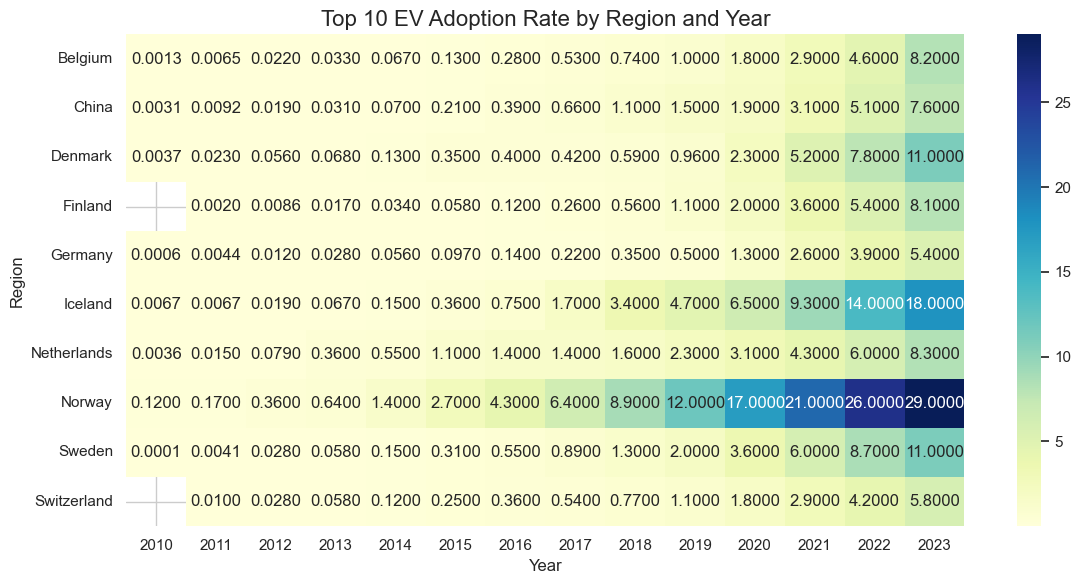

In [25]:


# Get the top 10 regions based on the highest EV stock share
top_regions = adoption_rate_df.groupby('region')['ev_stock_share'].max().nlargest(10).index

# Filter the data to include only the top 10 regions
heatmap_data = adoption_rate_df[adoption_rate_df['region'].isin(top_regions)].pivot_table(index='region', columns='year', values='ev_stock_share')

# Plot the heatmap
plt.figure(figsize=(12, 6))
sns.heatmap(heatmap_data, annot=True, cmap='YlGnBu', fmt='.4f')

# Title and labels
plt.title('Top 10 EV Adoption Rate by Region and Year', fontsize=16)
plt.xlabel('Year', fontsize=12)
plt.ylabel('Region', fontsize=12)

# Show plot
plt.tight_layout()
plt.show()


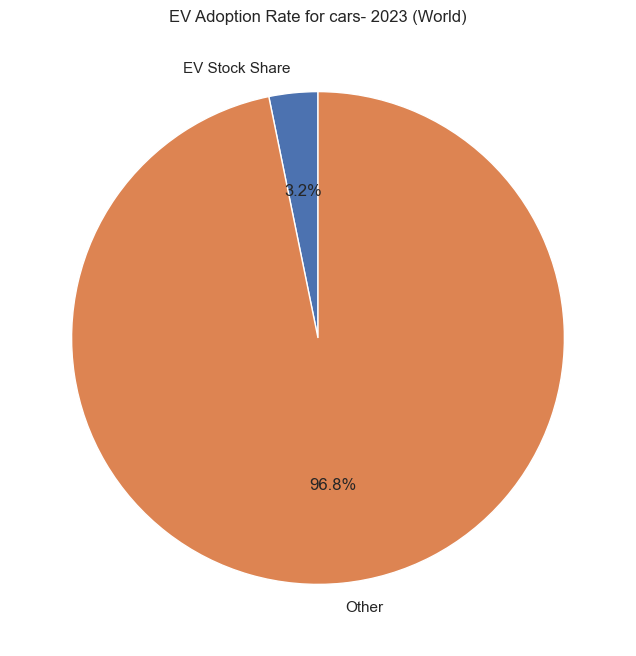

In [26]:


# Filter the dataframe for the required conditions
filtered_df = df[(df['region'] == 'World') & (df['year'] == 2023) & (df['mode'] == 'Cars') & (df['parameter'] == 'EV stock share')& (df['category'] == 'Historical')]

# Sum the 'value' column if needed (if there are multiple rows, otherwise you can skip this step)
ev_stock_share = filtered_df['value'].sum()

# Create a pie chart
plt.figure(figsize=(8, 8))
plt.pie([ev_stock_share, 100 - ev_stock_share], labels=['EV Stock Share', 'Other'], autopct='%1.1f%%', startangle=90)
plt.title('EV Adoption Rate for cars- 2023 (World)')
plt.ylabel('')  # To hide the label
plt.show()

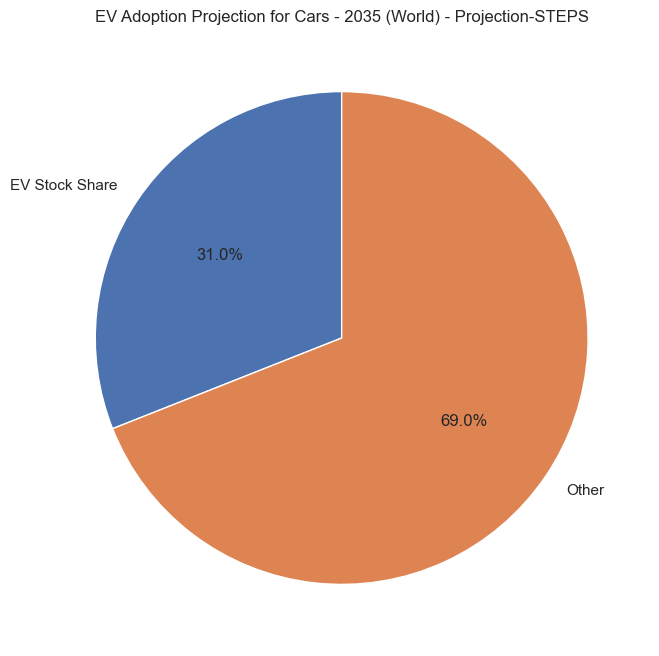

In [27]:


# Filter the dataframe for the required conditions (Projection-STEPS for 2035)
filtered_df_2035 = df[(df['region'] == 'World') & 
                       (df['year'] == 2035) & 
                       (df['mode'] == 'Cars') & 
                       (df['parameter'] == 'EV stock share') & 
                       (df['category'] == 'Projection-STEPS')]

# Sum the 'value' column (assuming there could be multiple entries, if only one entry, you can skip summing)
ev_stock_share_2035 = filtered_df_2035['value'].sum()

# Create a pie chart
plt.figure(figsize=(8, 8))
plt.pie([ev_stock_share_2035, 100 - ev_stock_share_2035], 
        labels=['EV Stock Share', 'Other'], 
        autopct='%1.1f%%', 
        startangle=90)
plt.title('EV Adoption Projection for Cars - 2035 (World) - Projection-STEPS')
plt.ylabel('')  # To hide the label
plt.show()


      region          category       parameter  mode powertrain  year  \
12457  World    Projection-APS  EV sales share  Cars         EV  2025   
12458  World    Projection-APS  EV stock share  Cars         EV  2025   
12465  World  Projection-STEPS  EV sales share  Cars         EV  2025   
12466  World  Projection-STEPS  EV stock share  Cars         EV  2025   
12473  World  Projection-STEPS  EV stock share  Cars         EV  2030   

          unit  value  
12457  percent   26.0  
12458  percent    6.0  
12465  percent   25.0  
12466  percent    6.0  
12473  percent   16.0  
['EV sales share' 'EV stock share']
['Projection-APS' 'Projection-STEPS']
[2025 2030 2035]


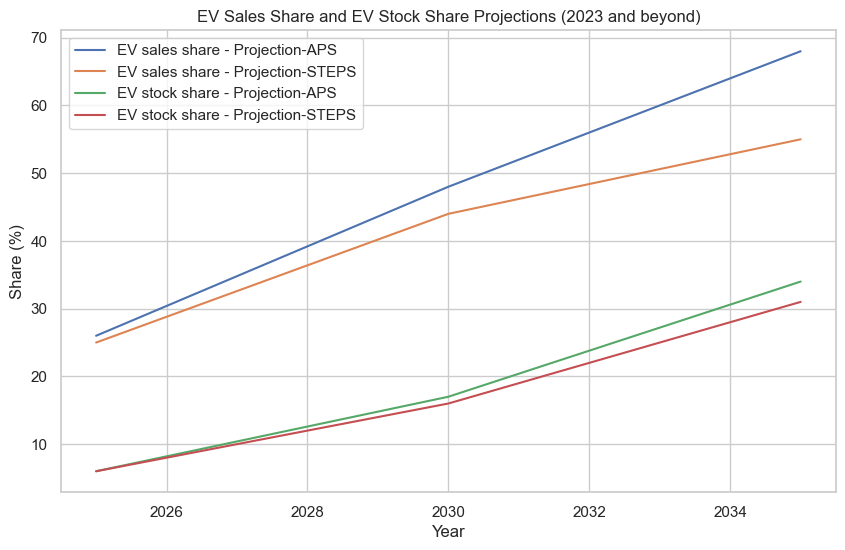

In [28]:



# Step 1: Filter data for 'EV sales share' and 'EV stock share' with the correct region, mode, and year
df_sales_share = df[(df['parameter'].isin(['EV sales share', 'EV stock share'])) & 
                    (df['region'] == 'World') & 
                    (df['mode'] == 'Cars') & 
                    (df['year'] > 2023)]

# Step 2: Check the filtered data to ensure it looks correct
print(df_sales_share.head())  # Display the first few rows
print(df_sales_share['parameter'].unique())  # Check unique values in 'parameter' column
print(df_sales_share['category'].unique())  # Check unique projection categories
print(df_sales_share['year'].unique())  # Check the years

# Step 3: Plot EV Sales Share and EV Stock Share for both APS and STEPS projections
plt.figure(figsize=(10, 6))

# Iterate over the unique projections (APS, STEPS) and metrics (EV sales share, EV stock share)
for param in ['EV sales share', 'EV stock share']:
    for projection in ['Projection-APS', 'Projection-STEPS']:
        # Filter the data for each combination of projection and parameter
        scenario_data = df_sales_share[(df_sales_share['parameter'] == param) & 
                                      (df_sales_share['category'] == projection)]
        
        # Check if there is data available for this projection
        if not scenario_data.empty:
            plt.plot(scenario_data['year'], scenario_data['value'], label=f'{param} - {projection}')
        else:
            print(f"No data for {param} under {projection} projection.")
    
plt.title('EV Sales Share and EV Stock Share Projections (2023 and beyond)')
plt.xlabel('Year')
plt.ylabel('Share (%)')
plt.legend()
plt.grid(True)
plt.show()




In [30]:
#dataframe to see ev trends based on powertrain
filtered_df = df.query("region == 'World' and category == 'Historical' and parameter == 'EV sales' and year <= 2023")

# Group by 'powertrain' and 'year', then sum the 'value'
grouped_df = filtered_df.groupby(['powertrain', 'year'])['value'].sum().reset_index()
grouped_df

,powertrain,year,value
0,BEV,2010,9837.0
1,BEV,2011,44580.0
2,BEV,2012,71528.0
3,BEV,2013,123140.0
4,BEV,2014,215355.0
5,BEV,2015,418000.0
6,BEV,2016,617000.0
7,BEV,2017,1006000.0
8,BEV,2018,1602000.0
9,BEV,2019,1656000.0


C:\Users\sdeep\AppData\Local\Temp\ipykernel_43808\3555831189.py:16: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  plt.gca().set_yticklabels([f'{x/1e6:.1f}M' for x in plt.gca().get_yticks()])


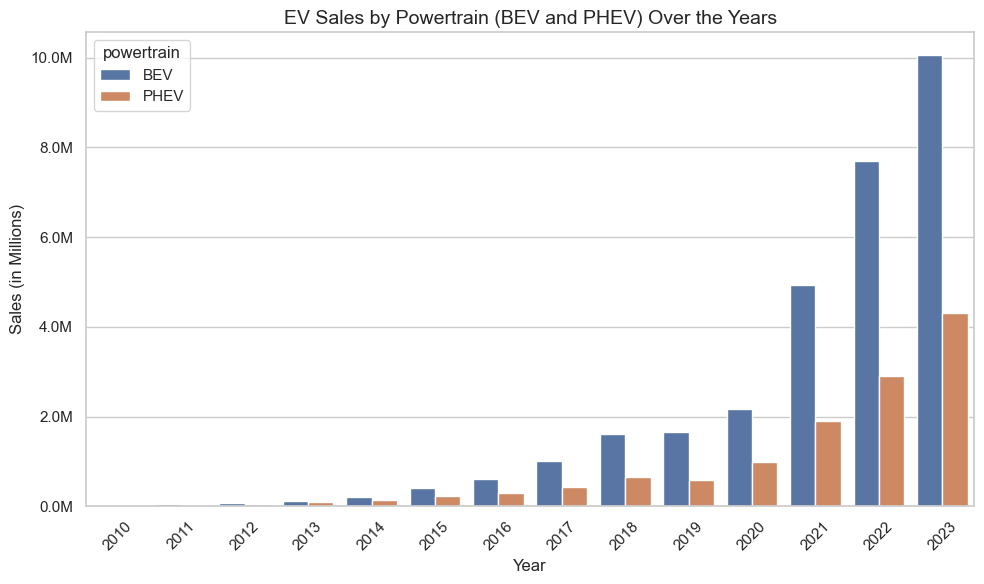

In [35]:
# Filter the DataFrame to include only BEV and PHEV
filtered_df = grouped_df[grouped_df['powertrain'].isin(['BEV', 'PHEV'])]

# Create the plot
plt.figure(figsize=(10, 6))

# Plot using seaborn barplot
sns.barplot(x='year', y='value', hue='powertrain', data=filtered_df, dodge=True)

# Set the labels and title
plt.title('EV Sales by Powertrain (BEV and PHEV) Over the Years', fontsize=14)
plt.xlabel('Year', fontsize=12)
plt.ylabel('Sales (in Millions)', fontsize=12)

# Divide the 'value' by 1,000,000 to display in millions
plt.gca().set_yticklabels([f'{x/1e6:.1f}M' for x in plt.gca().get_yticks()])

# Rotate the x-axis labels for better readability
plt.xticks(rotation=45)
plt.tight_layout()

# Show the plot
plt.show()